## 365 Multiple Linear Regression [Real-world Exercise Edition]
## A Way to solve the problem by Shoichi.
***

## Import Library & Default Settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

In [2]:
def adj_r2(x,y, model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

***
## Data Preprocessing

In [3]:
raw_data = pd.read_csv("Real_life_example.csv")

In [4]:
display(raw_data.head(5))
display(raw_data.dtypes)
display(raw_data.describe())
display(raw_data.describe(include=['object','bool']))
display(raw_data.isnull().sum(axis=0))

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
# TODO: DROP UNUSEFUL COLUMNS | DROP MISSING VALUE ROWS
# TODO: CLEAN ALL NUMERIC EXTREME OUTLIERS (> 0.99 percentile or < 0.01 percentile)
# TODO: Registration Convert [Yes | No] to Boolean[1 | 0]
data = raw_data.drop(['Model'], axis=1)
data = data.dropna(axis=0)
display(data.describe(include='all'))
display(data.isnull().sum(axis=0))


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

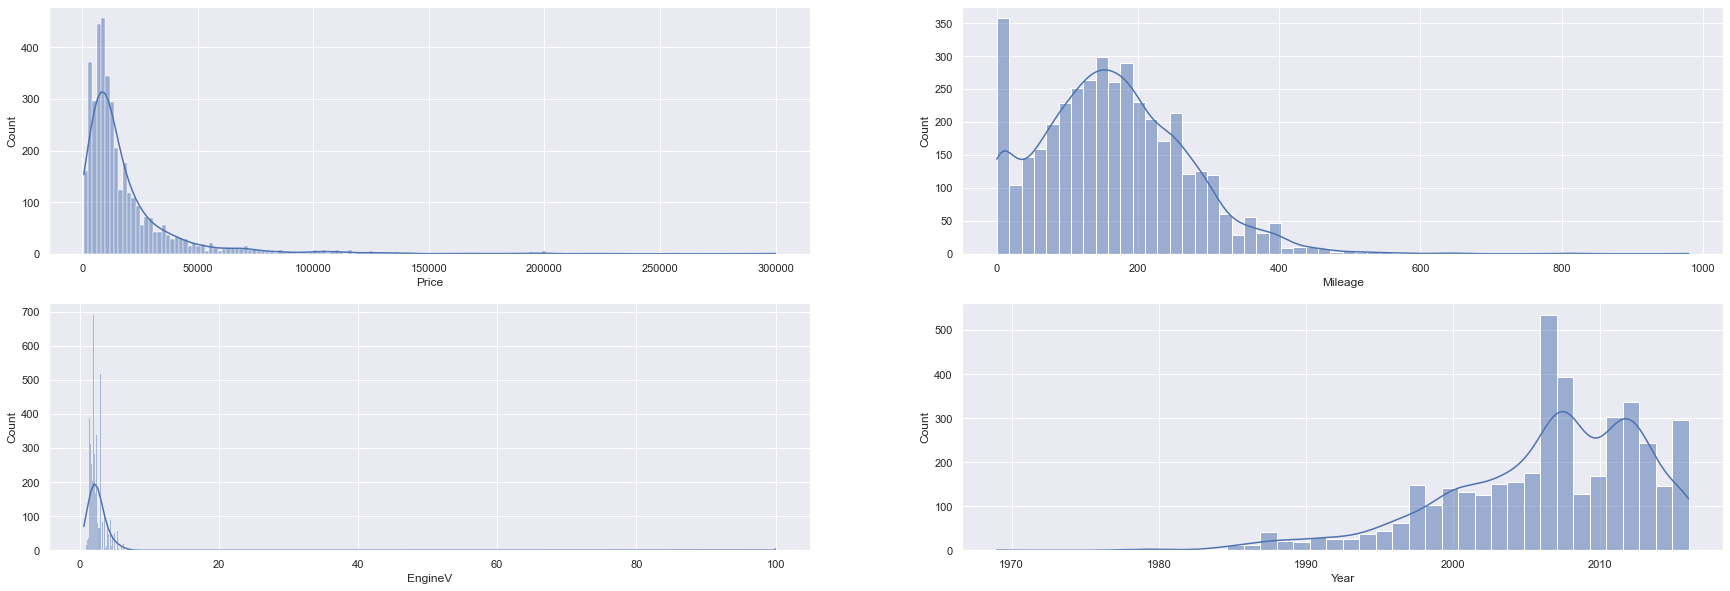

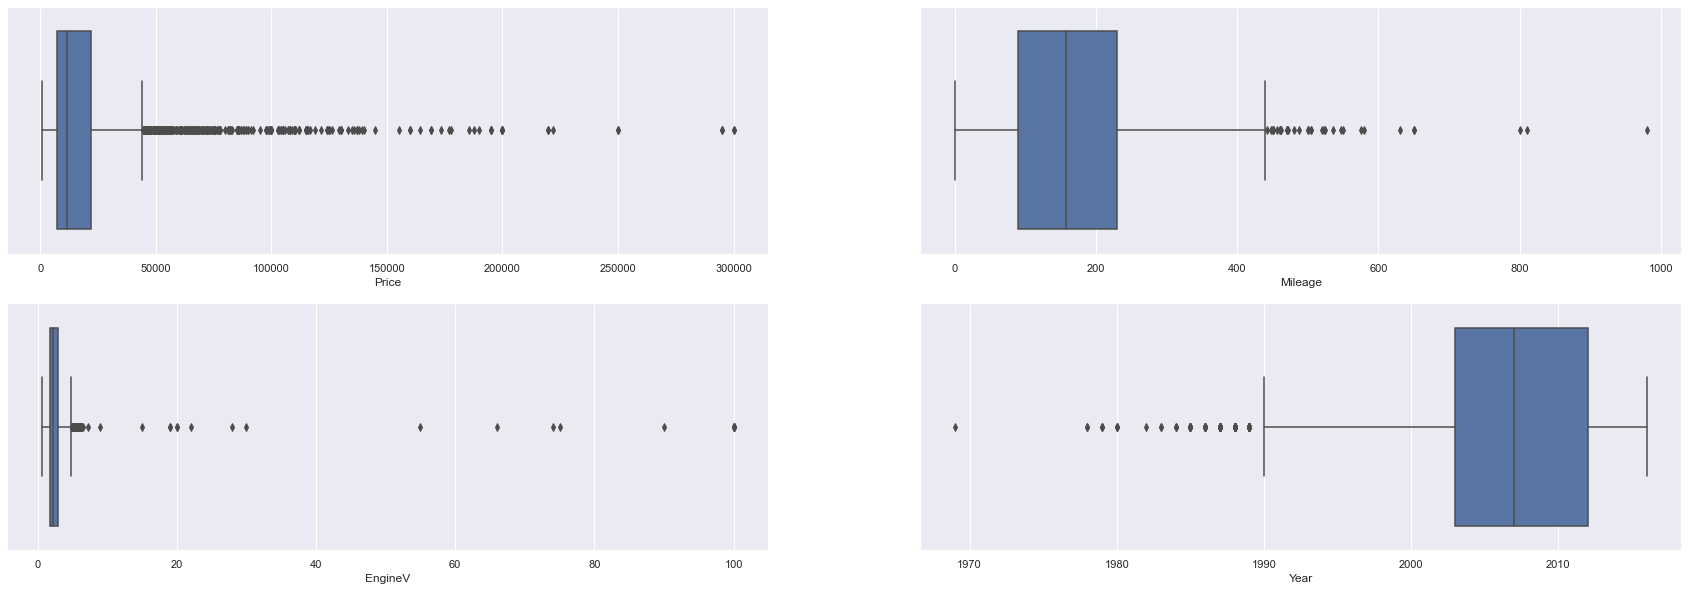

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(data.select_dtypes('number').columns, ax.flatten()):
        sns.histplot(x=data[feature], kde=True, ax=subplot)
fig2, ax2 = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(data.select_dtypes('number').columns, ax2.flatten()):
        sns.boxplot(x=data[feature], ax=subplot)

### Deal with Numeric Outliers

In [7]:
data = data[data['Price'] < data['Price'].quantile(0.99)]
data = data[data['Mileage'] < data['Mileage'].quantile(0.99)]
data = data[data['EngineV'] < 6.5]
data = data[data['Year'] > data['Year'].quantile(0.01)]
data = data.reset_index(drop=True)
display(data.describe(include='all'))

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


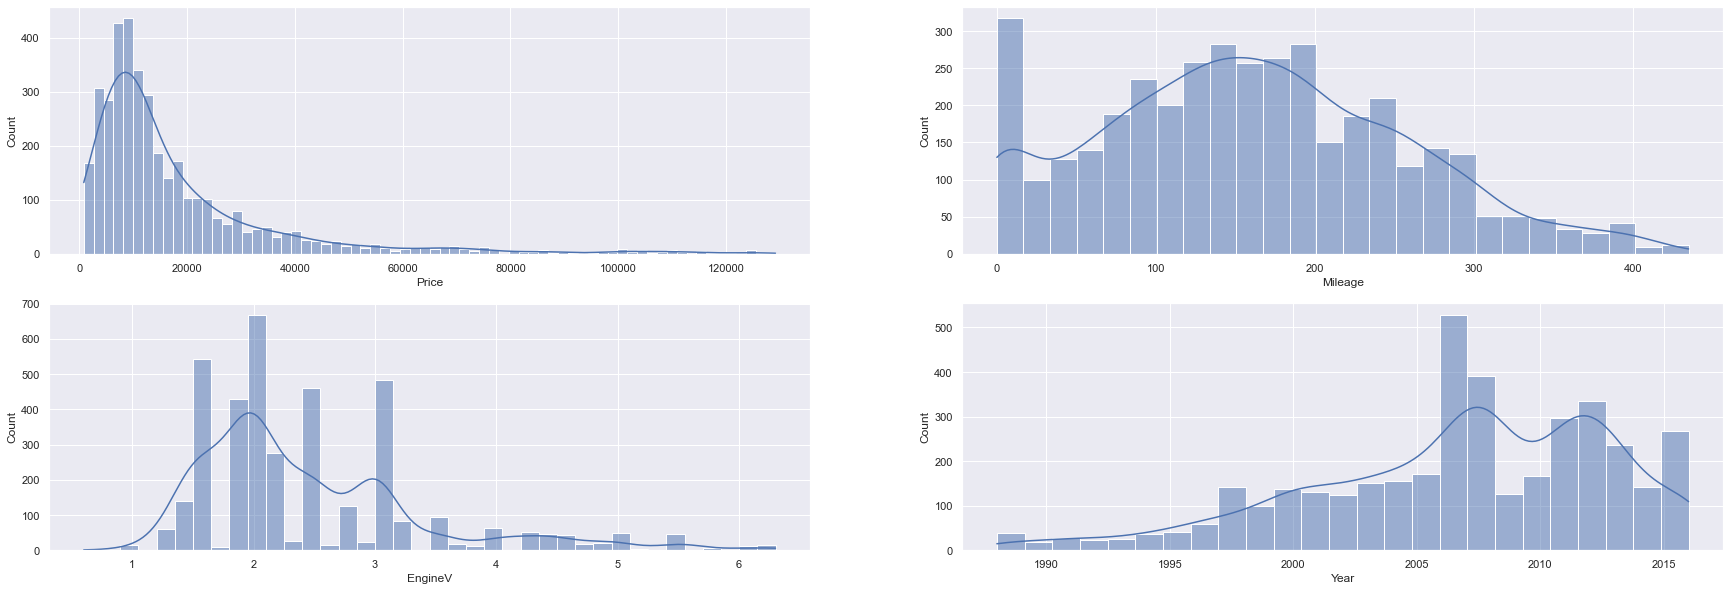

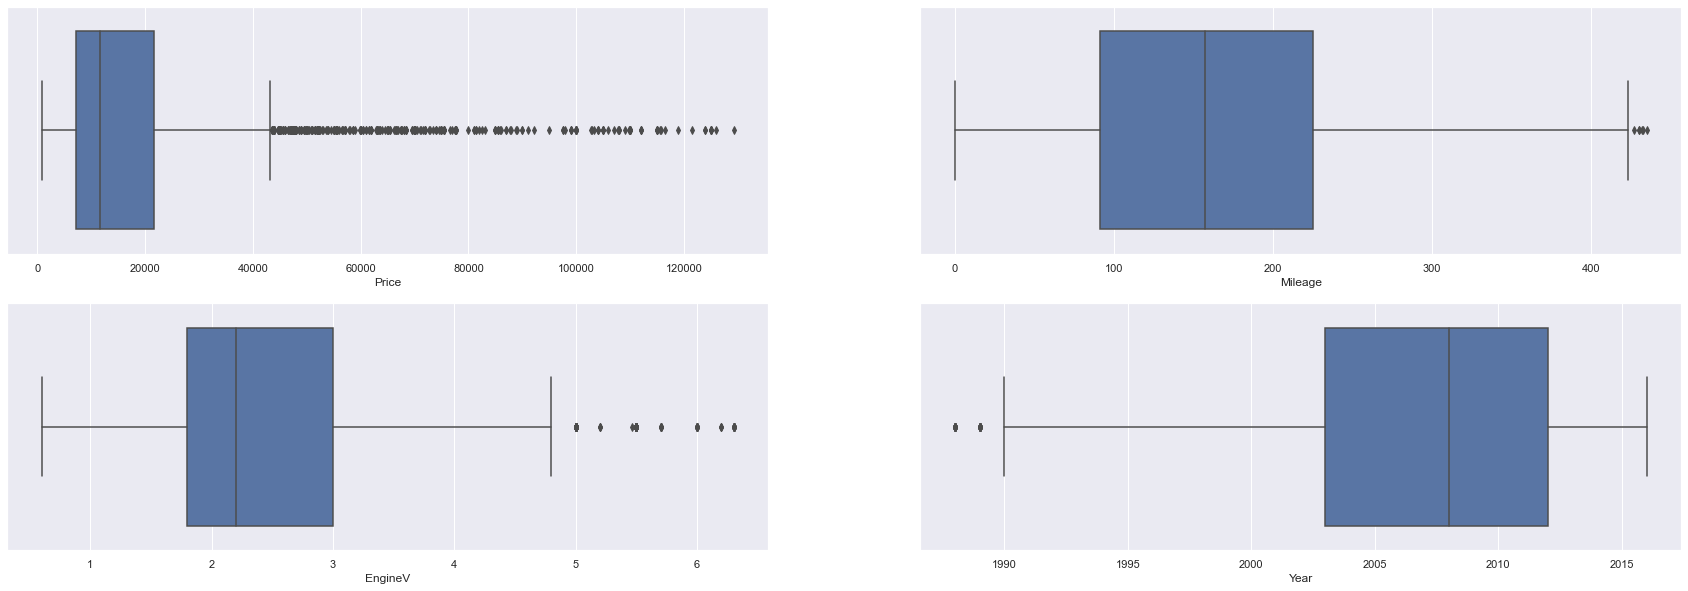

In [8]:
fig4, ax4 = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(data.select_dtypes('number').columns, ax4.flatten()):
        sns.histplot(x=data[feature], kde=True, ax=subplot)
fig5, ax5 = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(data.select_dtypes('number').columns, ax5.flatten()):
        sns.boxplot(x=data[feature], ax=subplot)

### Checking the OLS Assumption 
#### Linearity

<AxesSubplot:xlabel='EngineV', ylabel='Price'>

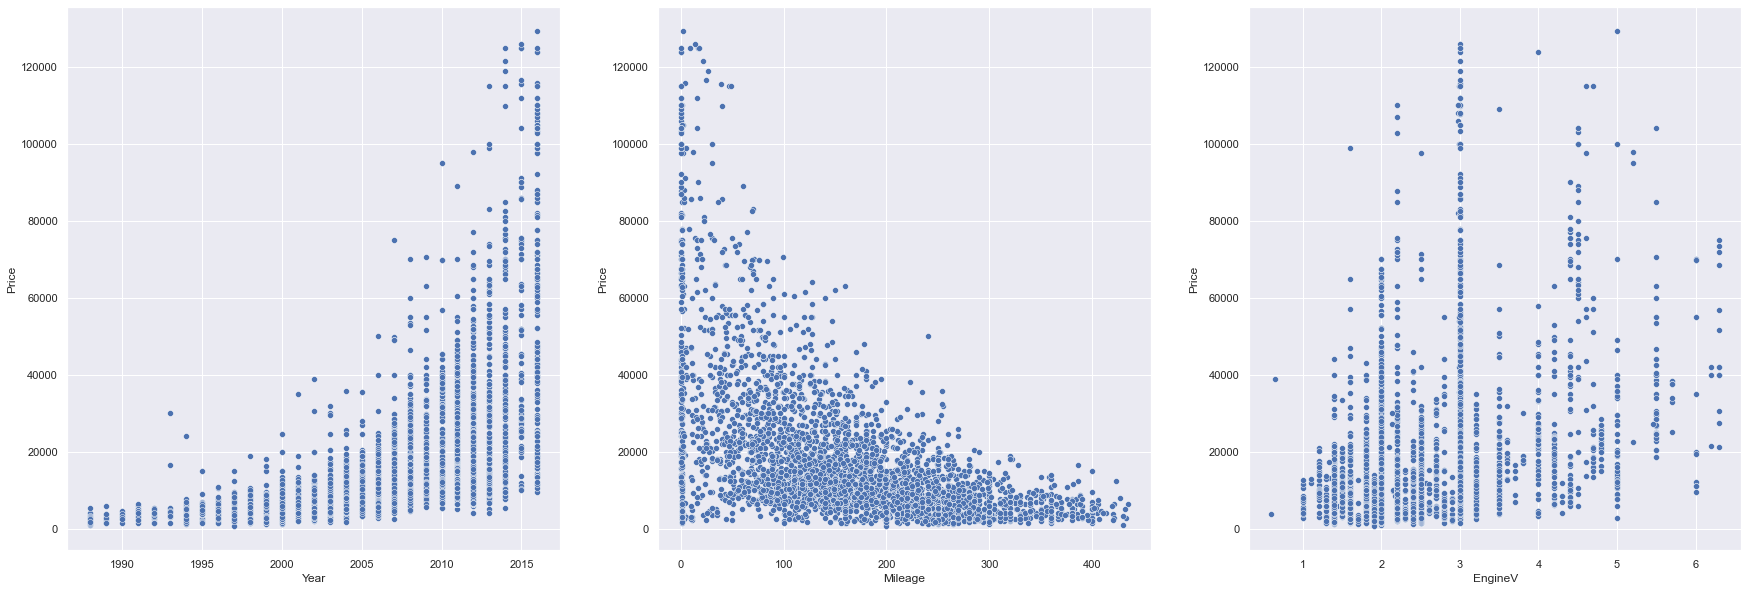

In [9]:
fig6, ax6 = plt.subplots(1, 3, figsize=(30,10))
sns.scatterplot(x=data['Year'],y=data['Price'], ax=ax6[0])
sns.scatterplot(x=data['Mileage'],y=data['Price'], ax=ax6[1])
sns.scatterplot(x=data['EngineV'],y=data['Price'], ax=ax6[2])


In [10]:
# LOG TRANSFORM FIXING NON-LINEARITY OF CORRELATION
if 'Price' in data.columns:
    data['log_price'] = np.log(data['Price'])
    data = data.drop(columns=['Price'])
display(data)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


<AxesSubplot:xlabel='EngineV', ylabel='log_price'>

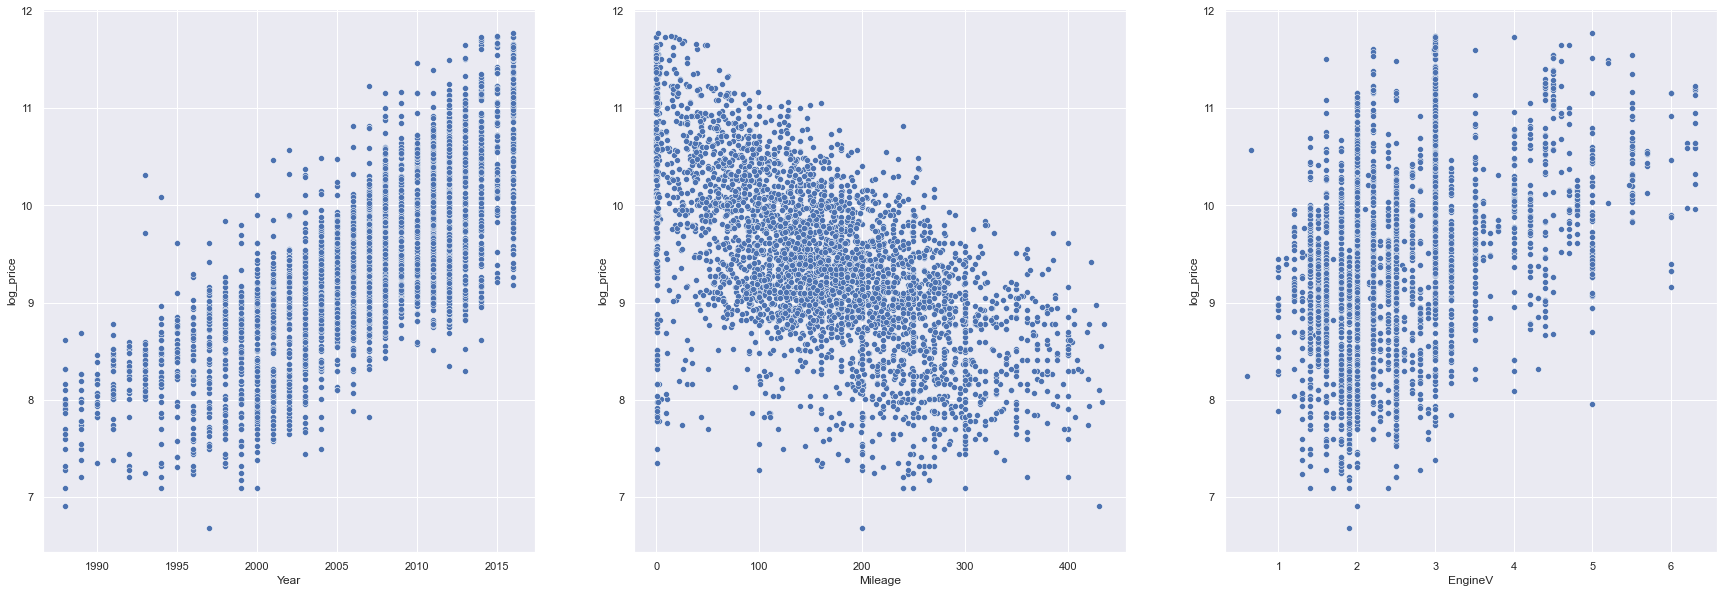

In [11]:
# COMPARE FEATURE WITH LOG PRICE INSTEAD
# 1 UNIT OF EACH FEATURE INCREASE = bx % increase in price
fig7, ax7 = plt.subplots(1, 3, figsize=(30,10))
sns.scatterplot(x=data['Year'],y=data['log_price'], ax=ax7[0])
sns.scatterplot(x=data['Mileage'],y=data['log_price'], ax=ax7[1])
sns.scatterplot(x=data['EngineV'],y=data['log_price'], ax=ax7[2])


#### Multicollinearity
#### Normally, a car with high {Mileage} result in the lower of {year} the car is old.
#### Both have some correlation to each other probably negative correlation.

'Correlation Coef of all features / targets'

,Mileage,EngineV,Year,log_price
Mileage,1.000000,0.005710,-0.715361,-0.614806
EngineV,0.005710,1.000000,-0.020152,0.411935
Year,-0.715361,-0.020152,1.000000,0.746907
log_price,-0.614806,0.411935,0.746907,1.000000


,Features,VIF Corr
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


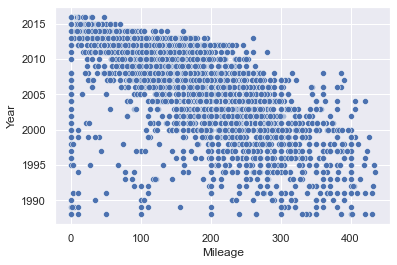

In [12]:
# PROVE
multicol_test_features = data[['Mileage','Year','EngineV']]
vif_summary = pd.DataFrame({"Features": multicol_test_features.columns})
vif_summary["VIF Corr"] = [variance_inflation_factor(multicol_test_features.values, i) for i in range(multicol_test_features.shape[1])]
sns.scatterplot(x=data['Mileage'],y=data['Year'])
display('Correlation Coef of all features / targets', data.corr(), vif_summary)


In [13]:
# DROP YEAR COLUMNS SINCE IT IS NOT A REAL
if 'Year' in data.columns:
    data = data.drop(columns=['Year'])
display(data)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Deal with Categorical Features

In [14]:
display(data.describe(include=["object","bool"]))

,Brand,Body,Engine Type,Registration
count,3867,3867,3867,3867
unique,7,6,4,2
top,Volkswagen,sedan,Diesel,yes
freq,848,1467,1807,3505


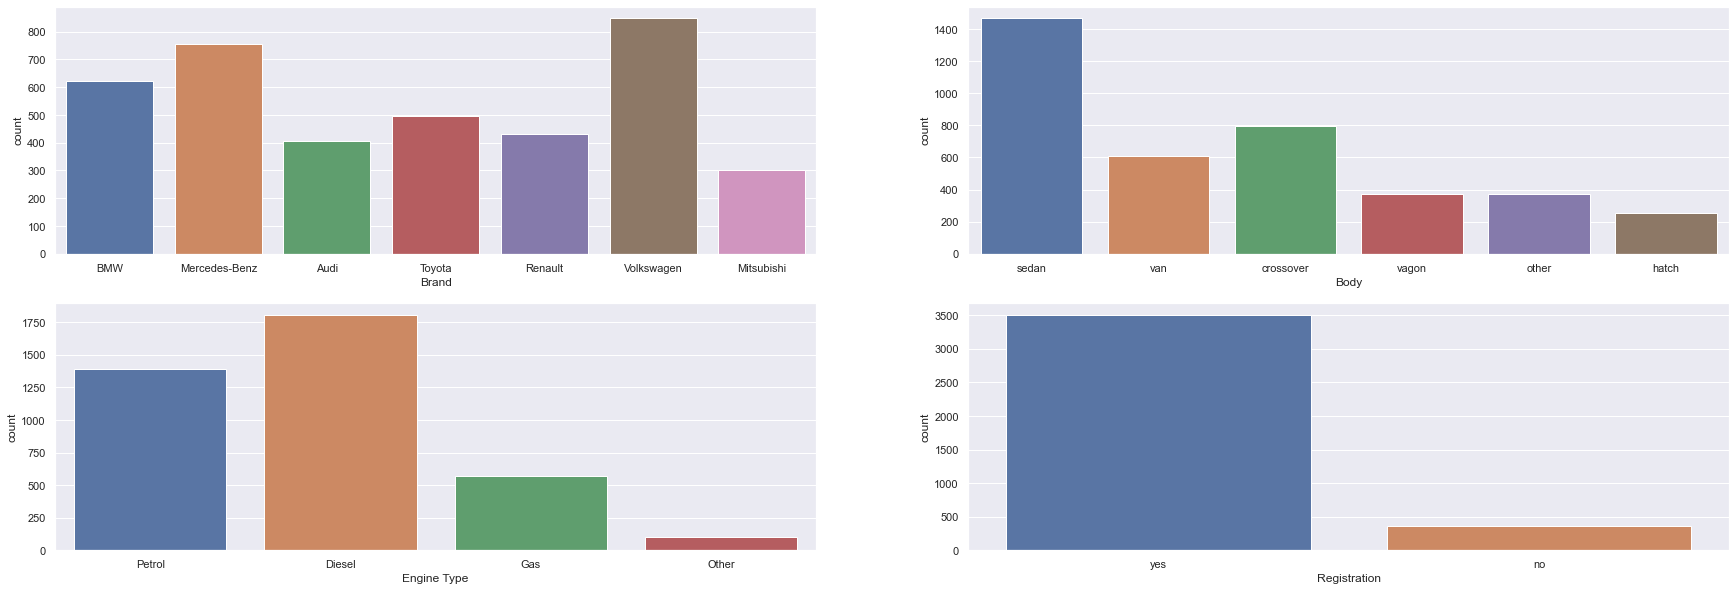

In [15]:
# OUTLIERS OF EACH UNIQUE VALUE IN FEATURES
fig3, ax3 = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(data.select_dtypes('object').columns, ax3.flatten()):
        sns.countplot(x=data[feature], ax=subplot)

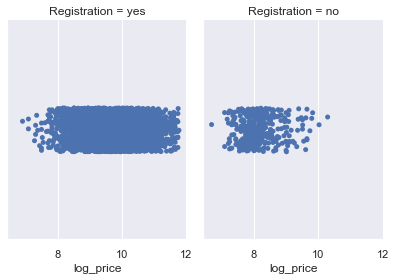

In [16]:
sns.catplot(x="log_price", col="Registration", data=data, kind="strip", height=4, aspect=.7)

In [ ]:
# Feature Registration has 3505 out of 3867 [90%] YES values
# It is unbalanced since there are not enough NO values to distinct the different between yes and no interm of price
#if 'Registration' in data.columns:
#    data = data.drop(columns=['Registration'])
#display(data)

In [17]:
# Feature Registration to Boolean
data['Registration'] = data['Registration'].map({'yes': 1, 'no': 0})
display(data)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,1,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,1,9.495519
3,Audi,crossover,240,4.2,Petrol,1,10.043249
4,Toyota,crossover,120,2.0,Petrol,1,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,1,9.350102
3863,Toyota,sedan,35,1.6,Petrol,1,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,1,11.736069
3865,BMW,sedan,1,3.5,Petrol,1,8.779557


In [18]:
# ONE-HOT ENCODED DATA
data = pd.get_dummies(data, drop_first=True)
display(data)

,Mileage,EngineV,Registration,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,1,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,1,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,1,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,1,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,1,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,1,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3863,35,1.6,1,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3864,9,3.0,1,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3865,1,3.5,1,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
# Let's simply drop log_price from data_preprocessed
multicol_test_features_2 = data.drop(['log_price'],axis=1)
vif_summary_2 = pd.DataFrame({'Features': multicol_test_features_2.columns})
vif_summary_2["VIF"] = [variance_inflation_factor(multicol_test_features_2.values, i) for i in range(multicol_test_features_2.shape[1])]
display(vif_summary_2)

,Features,VIF
0,Mileage,4.459662
1,EngineV,7.841729
2,Registration,9.641446
3,Brand_BMW,2.294007
4,Brand_Mercedes-Benz,2.868649
5,Brand_Mitsubishi,1.641712
6,Brand_Renault,2.086774
7,Brand_Toyota,2.162166
8,Brand_Volkswagen,2.844515
9,Body_hatch,1.464260


***
### LINEAR REGRESSION MODEL
***
#### Define features / targets

In [20]:
input_features = data.drop(columns=['log_price'])
targets = data['log_price']
display(input_features.head(3), targets.head(3))

,Mileage,EngineV,Registration,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0


0    8.342840
1    8.974618
2    9.495519
Name: log_price, dtype: float64

### Scale Data

In [21]:
scaler = StandardScaler()
scaler.fit(input_features)

StandardScaler()

In [22]:
input_features_scaled = scaler.transform(input_features)

### Train-test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(input_features_scaled, targets, test_size=0.25, random_state=221)
display(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(2900, 17)

(2900,)

(967, 17)

(967,)

### Regression Model

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_predicted = model.predict(x_train)

Text(0, 0.5, 'Pred Y')

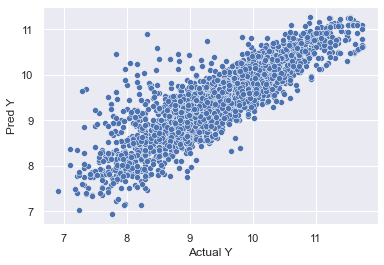

In [28]:
# COMPARE PREDICTION VALUE WITH ACTUAL ONE
# IF IT IS 100% R^2 THEN ALL POINTS WOULD BE THE SAME
sns.scatterplot(x=y_train, y=y_predicted)
plt.xlabel('Actual Y')
plt.ylabel('Pred Y')

<AxesSubplot:xlabel='log_price', ylabel='Count'>

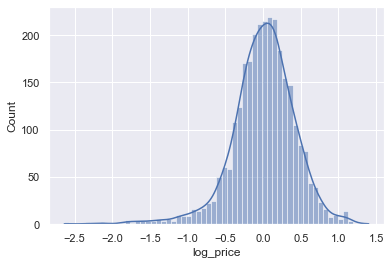

In [29]:
# NORMALITY AND HOMOSCEDASTICITY
# ERROR (Actual value - Predicted Value) SHOULD HAVE MEAN ~= 0
# ERROR SHOULD HAVE NORMAL DISTRIBUTION WHEN UNIFORM IS NOT POSSIBLE
# HOMOSCEDASTICITY A VARIANCE OF ACTUAL VALUE COMPARED TO PREDICTED VALUE SHOULD BE THE SAME ESTIMATED EQUAL
sns.histplot(y_train - y_predicted, kde=True)

In [30]:
R2_Score = model.score(x_train, y_train)
display(R2_Score)

0.7575726112811356

In [31]:
R2_Score_adj = adj_r2(x_train, y_train, model)
display(R2_Score_adj)

0.7561426093351882

In [39]:
model_summary = pd.DataFrame({"Features":input_features.columns})
model_summary["Coeffiennt"] = model.coef_
model_summary.iloc[-1] = ["Intercept", model.intercept_]
display(model_summary)

,Features,Coeffiennt
0,Mileage,-0.459115
1,EngineV,0.214442
2,Registration,0.311234
3,Brand_BMW,0.031632
4,Brand_Mercedes-Benz,0.011319
5,Brand_Mitsubishi,-0.130707
6,Brand_Renault,-0.171500
7,Brand_Toyota,-0.053535
8,Brand_Volkswagen,-0.075057
9,Body_hatch,-0.151057


***
### TESTING ZONE
***

In [40]:
y_test_predicted = model.predict(x_test)

Text(0, 0.5, 'Pred Y')

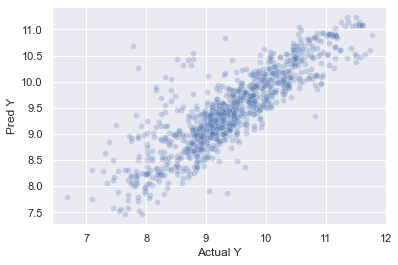

In [44]:
# COMPARE PREDICTION VALUE WITH ACTUAL ONE
# IF IT IS 100% R^2 THEN ALL POINTS WOULD BE THE SAME
sns.scatterplot(x=y_test, y=y_test_predicted, alpha=0.25)
plt.xlabel('Actual Y')
plt.ylabel('Pred Y')

In [48]:
test_summary = pd.DataFrame(np.exp(y_test_predicted), columns=['Predicted'])
display(test_summary.head())


,Predicted
0,6009.236613
1,9779.054987
2,18738.223699
3,7067.394185
4,9991.433008


In [49]:
# RESET INDEX OF y_test from train-test split original
y_test = y_test.reset_index(drop=True)

In [52]:
test_summary['Actual'] = np.exp(y_test)
display(test_summary.head(5))

,Predicted,Actual
0,6009.236613,6500.0
1,9779.054987,9300.0
2,18738.223699,21000.0
3,7067.394185,6399.0
4,9991.433008,8000.0


In [59]:
test_summary['Residual'] = test_summary['Actual'] - test_summary['Predicted']
test_summary['Error%'] = np.absolute(test_summary['Residual']/test_summary['Actual']*100)
display(test_summary.head(5))

,Predicted,Actual,Residual,Error%
0,6009.236613,6500.0,490.763387,7.550206
1,9779.054987,9300.0,-479.054987,5.151129
2,18738.223699,21000.0,2261.776301,10.770363
3,7067.394185,6399.0,-668.394185,10.445291
4,9991.433008,8000.0,-1991.433008,24.892913


In [60]:
test_summary.describe()

,Predicted,Actual,Residual,Error%
count,967.000000,967.000000,967.000000,967.000000
mean,16621.618279,18167.480714,1545.862434,41.175541
std,13243.713868,19059.572358,10662.127538,88.107008
min,1735.127806,800.000000,-41038.273094,0.021517
25%,7872.222754,7100.000000,-2354.554864,10.349644
50%,12108.780411,11500.000000,-31.821051,22.652691
75%,21180.575085,21500.000000,2855.653645,39.727925
max,76415.268852,129222.000000,84580.199230,1709.928046


In [63]:
R2_Score_test = model.score(x_test, y_test)
R2_Score_test_adj = adj_r2(x_test, y_test, model)
display(R2_Score_test, R2_Score_test_adj)

0.7303094683777267

0.725478341889235

In [61]:
pd.options.display.max_rows = 999
test_summary.sort_values(by=['Error%'])

,Predicted,Actual,Residual,Error%
280,17203.700863,17200.00,-3.700863,0.021517
778,7989.928312,8000.00,10.071688,0.125896
906,7488.643171,7500.00,11.356829,0.151424
831,10581.542174,10600.00,18.457826,0.174130
60,11679.493535,11700.00,20.506465,0.175269
144,12723.580578,12750.00,26.419422,0.207211
108,8877.443312,8900.00,22.556688,0.253446
111,13036.911521,12999.00,-37.911521,0.291650
613,23271.397413,23200.00,-71.397413,0.307747
407,8732.527185,8700.00,-32.527185,0.373876
